<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# TAL Labo 1c : Opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [2]:
import nltk
import os
from urllib import request
import matplotlib.pyplot 
%matplotlib inline

**1.** S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [4]:
url2 = "https://en.wikipedia.org/wiki/Switzerland"
response = request.urlopen(url2)
raw = response.read().decode('utf8')

print(f"La longueur est de {len(raw)}")


La longueur est de 1034796


Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le code source de la page est stocké dans `html2`, on extrait le texte dans `raw2`.

In [6]:
from bs4 import BeautifulSoup

**2.** Veuillez réutiliser la méthode du _notebook_ 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse (il ne parle pas de la Suisse).  Quelle est la longueur du résultat ?  Veuillez afficher ses 100 premiers et 100 derniers caractères.

In [7]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
response = request.urlopen(url2)
html2 = response.read().decode('utf8')
raw2 = BeautifulSoup(html2, 'html.parser').get_text()

index_of_start = raw2.find("Swiss Confederation\nFive official names")
index_of_end = raw2.find("[281][282]")
print(f"Longueur brute: {len(raw2)}")
raw2 = raw2[index_of_start:index_of_end]

print("Premiers 100 chars : \n %s \n" %raw2[:100])
print("Derniers 100 chars : \n %s" %raw2[-100:])

Longueur brute: 167176
Premiers 100 chars : 
 Swiss Confederation
Five official names

Schweizerische Eidgenossenschaft (German)Confédération suis 

Derniers 100 chars : 
  Chasselas (called Fendant in Valais) and Pinot Noir. Merlot is the main variety produced in Ticino.


**3.** Veuillez effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Veuillez écrire le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [8]:
filename = "sample_web_page.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_web_page.txt
if os.path.exists(filename): 
    os.remove(filename)

# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
sentences = nltk.sent_tokenize(raw2)
with open(filename, "a", encoding="utf8") as fd:
    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence)
        fd.write(" ".join(tokens) + "\n")

In [ ]:
# Votre appréciation de la qualité ici :
# La qualité de la tokenisation est bonne, mais il y a des problèmes avec les notes de bas de page et les références, qui sont incluses dans le texte.
# On pourrait les enlever en cherchant le pattern [...] et en le remplaçant par une chaîne vide.

**4.** Veuillez maintenant effectuer la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [9]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
words2 = nltk.word_tokenize(raw2)
print(f"Nombre de tokens: {len(words2)}")

Nombre de tokens: 17574


**5.** Veuillez créer un objet de type `nltk.Text` à partir de la liste de *tokens* `words2`.
* Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant cet objet en un `set`.  
* Combien de mots différents y a-t-il dans le vocabulaire, incluant les ponctuations et tout autre symbole ? 
* Quels sont les 20 types les plus longs ? Que pensez-vous du résultat trouvé ?

In [10]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
text_nltk = nltk.Text(words2)
types = set(text_nltk)
print("Nombre de mots différents dans le vocabulaire: %d" %len(types))
longest_words = sorted(types, key=len, reverse=True)
print(longest_words[:20])
 

Nombre de mots différents dans le vocabulaire: 4263
['languagesGermanFrenchItalianRomanshReligion', 'Svizzer/SvizraGovernmentFederal', 'Schweizer/SchweizerinFrench', 'elvetico/elveticaRomansh', 'Suisse/SuissesseItalian', 'Donau-Iller-Rhine-Limes', '65,000-kilometre-long', 'assembly-independent', 'machines/electronics', 'policies—contributes', 'Switzerland–European', 'instruments/watches', 'non-German-speaking', '57.1-kilometre-long', 'Baume-SchneiderBeat', 'multi-disciplinary', 'cityZurichOfficial', 'LegislatureFederal', 'commander-in-chief', 'near-Mediterranean']


In [ ]:
# Votre réponse à la question ici :
# On voit ici que comme dans le labo1b, on obtient des mots composés mais en plus de ça on obtient aussi des artéfacts de la page web comme "languagesGermanFrenchItalianRomanshReligion"
# Aussi, des mots en allemand et francais, des distances et des mots avec "/" qui representent des termes alternatifs.

**6.** Veuillez construire un objet `FreqDist` avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [11]:
words_alpha = [word.lower() for word in text_nltk if word.isalpha()]
fdist_alpha = nltk.FreqDist(words_alpha)

print(f"Nombre de types alphabétiques: {len(fdist_alpha)}")
print(fdist_alpha.most_common(30))

Nombre de types alphabétiques: 3119
[('the', 1152), ('of', 560), ('in', 464), ('and', 459), ('to', 232), ('switzerland', 225), ('swiss', 185), ('a', 178), ('is', 151), ('as', 102), ('federal', 98), ('by', 92), ('for', 89), ('are', 87), ('was', 85), ('with', 78), ('from', 70), ('it', 61), ('world', 52), ('at', 49), ('has', 47), ('on', 46), ('most', 44), ('its', 44), ('one', 41), ('an', 41), ('other', 39), ('population', 39), ('cantons', 38), ('main', 38)]


**7.** Veuillez afficher le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

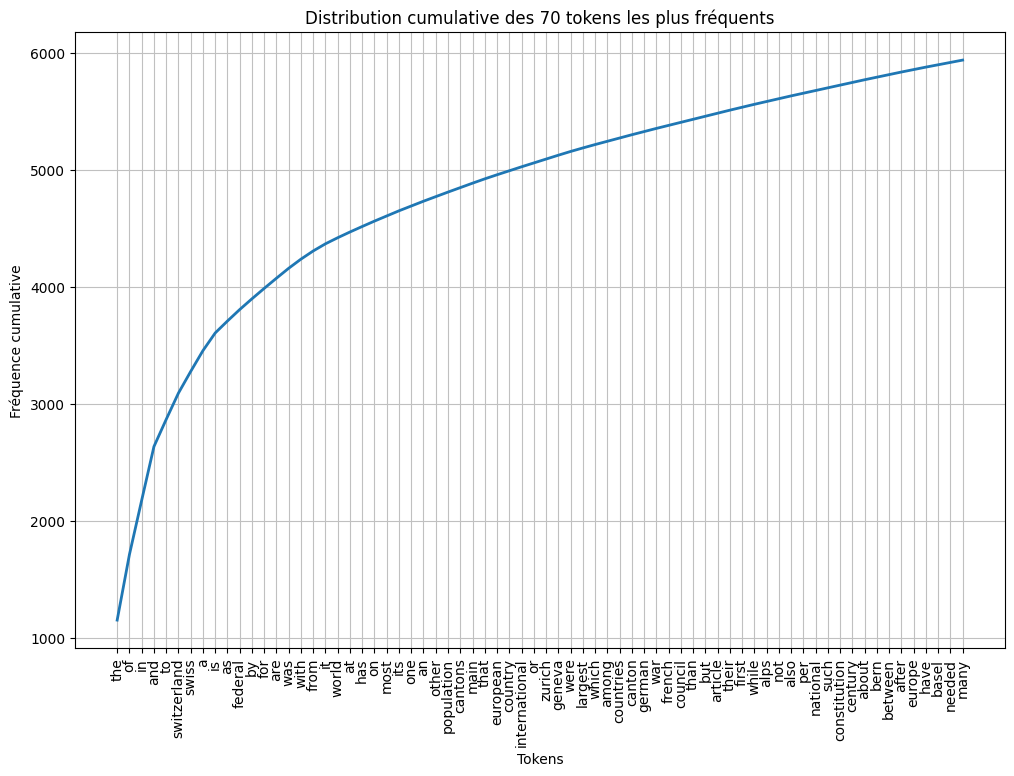

In [12]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
fdist_alpha.plot(70, cumulative=True, title="Distribution cumulative des 70 tokens les plus fréquents")
ax = plt.gca()
ax.set_xlabel("Tokens")
ax.set_ylabel("Fréquence cumulative")
plt.show()


**8.** Veuillez construire une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

Distribution des longueurs des tokens :
Longueur 1 : 3528 occurrences
Longueur 2 : 2357 occurrences
Longueur 3 : 2851 occurrences
Longueur 4 : 1646 occurrences
Longueur 5 : 1414 occurrences
Longueur 6 : 1287 occurrences
Longueur 7 : 1374 occurrences
Longueur 8 : 927 occurrences
Longueur 9 : 675 occurrences
Longueur 10 : 537 occurrences
Longueur 11 : 498 occurrences
Longueur 12 : 199 occurrences
Longueur 13 : 155 occurrences
Longueur 14 : 51 occurrences
Longueur 15 : 32 occurrences
Longueur 16 : 12 occurrences
Longueur 17 : 8 occurrences
Longueur 18 : 8 occurrences
Longueur 19 : 4 occurrences
Longueur 20 : 4 occurrences
Longueur 21 : 1 occurrences
Longueur 23 : 2 occurrences
Longueur 24 : 1 occurrences
Longueur 27 : 1 occurrences
Longueur 31 : 1 occurrences
Longueur 43 : 1 occurrences


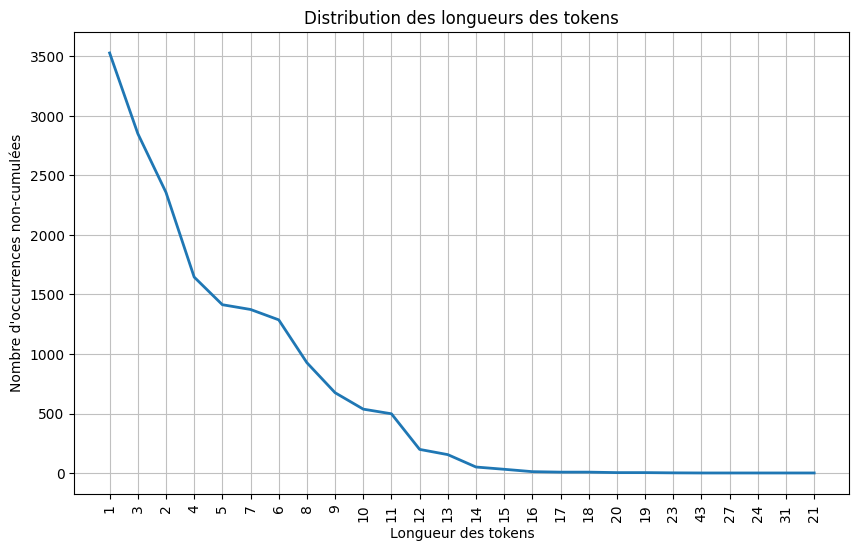

In [13]:
token_lengths = [len(token) for token in text_nltk]
fdist_lengths = nltk.FreqDist(token_lengths)

print("Distribution des longueurs des tokens :")
for length, count in sorted(fdist_lengths.items()):
    print(f"Longueur {length} : {count} occurrences")
    
plt.figure(figsize=(10, 6))
fdist_lengths.plot(title="Distribution des longueurs des tokens")
plt.xlabel("Longueur des tokens")
plt.ylabel("Nombre d'occurrences non-cumulées")
plt.show()



In [107]:
# Votre réponse à la question ici :
# Comme dans la partie précédente, la fréquence de tokens diminue avec la longueur des tokens.
# Cela est dû au fait que les tokens plus longs sont plus rares et que la plupart des tokens sont courts.
# Les mots courts les plus fréquents sont probablement des mots grammaticaux, des mots de liaison, des prépositions, etc.
# Comme: the, of, in, as, by, and, etc.
# On constate qu'il semble également confirmer la loi de Zipf, car la fréquence des tokens diminue avec la longueur des tokens.

In [105]:
# Mots les plus fréquents de longueur 3
words_2_3 = [word for word in words_alpha if len(word) == 3 or len(word) == 2]
fdist_2_3 = nltk.FreqDist(words_2_3)
fdist_2_3

FreqDist({'the': 1152, 'of': 555, 'in': 463, 'and': 458, 'to': 232, 'is': 151, 'as': 102, 'by': 92, 'are': 87, 'for': 87, ...})

## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_ sous le nom `TAL_labo1c_NOM1_NOM2.ipynb`.  Ajoutez-le dans une archive _zip_ avec le _notebook_ 1b, et soumettez l'archive individuellement sur Cyberlearn. 